# Lesson 02

**To do**
- aggiungere sfera

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

In [4]:
# plot parameters
import sys
sys.path.append('./../Libraries/')
import plt_params
%matplotlib inline

## Exercise 02.1

**1D integral**

- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

Show a picture of both your estimations of $I$ and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

In [5]:
# import files
unif = np.loadtxt('02.1/unif_sampl.csv', delimiter=',', skiprows=1)
impo = np.loadtxt('02.1/impo_sampl.csv', delimiter=',', skiprows=1)

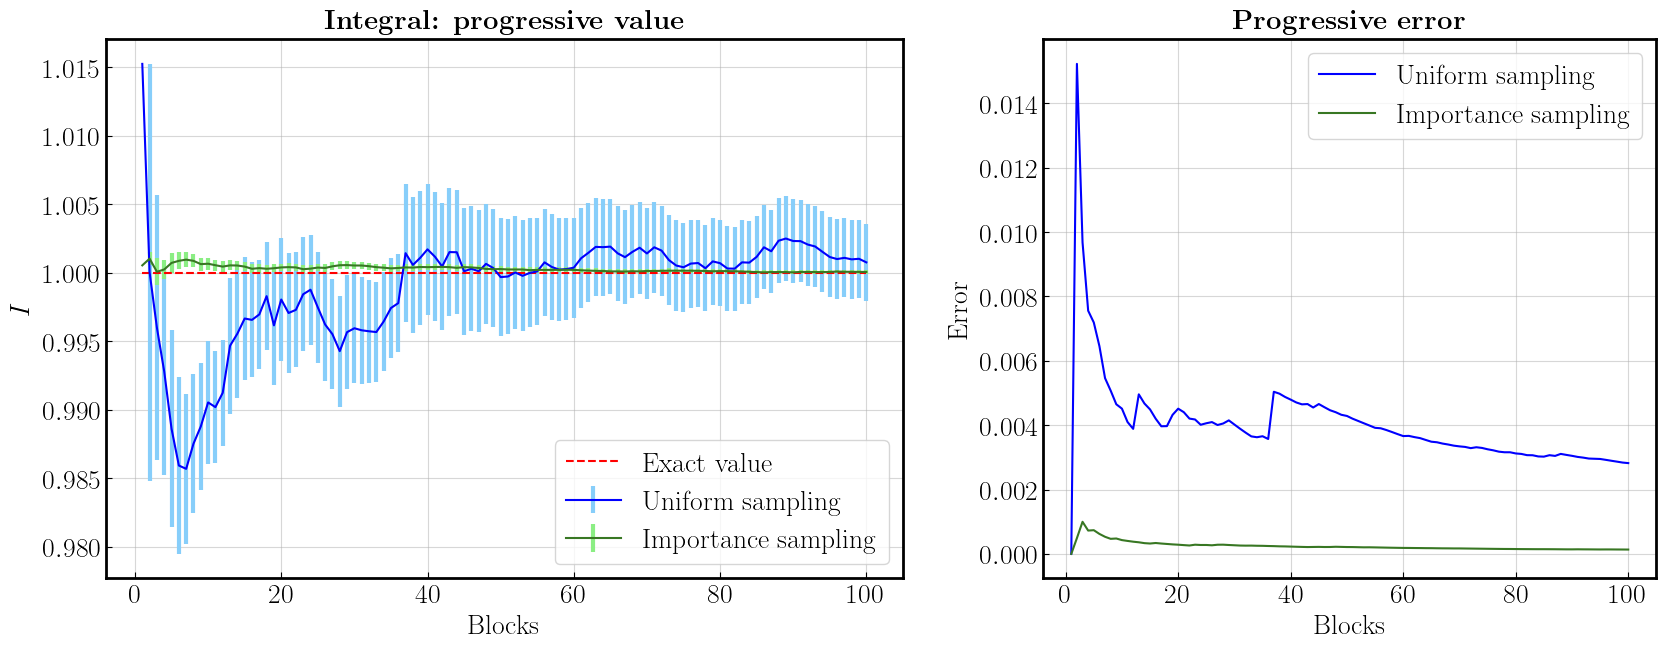

In [6]:
# plots
fig1, axs = plt.subplots(1, 2, figsize=(20, 7), gridspec_kw={'width_ratios': [1.3, 1]})

axs[0].errorbar(unif[:,0], unif[:,2], yerr=unif[:,3], fmt='-', color='blue', ecolor='lightskyblue', elinewidth=3, label='Uniform sampling')
axs[0].errorbar(impo[:,0], impo[:,2], yerr=impo[:,3], fmt='-', color='#387723', ecolor='#8BEE84', elinewidth=3, label='Importance sampling')
one = np.ones(unif.shape[0])
axs[0].plot(unif[:,0], one, linestyle='--', color='red', label='Exact value')


axs[0].set_title(r'\textbf{Integral: progressive value}', pad=8)
axs[0].set_xlabel('Blocks')
axs[0].set_ylabel(r'$I$', labelpad=6)
axs[0].legend(loc='lower right')


axs[1].plot(unif[:,0], unif[:,3], color='blue', label='Uniform sampling')
axs[1].plot(impo[:,0], impo[:,3], color='#387723', label='Importance sampling')

axs[1].set_title(r'\textbf{Progressive error}', pad=8)
axs[1].set_xlabel('Blocks')
axs[1].set_ylabel('Error', labelpad=6)
axs[1].legend()

plt.show(fig1)
plt.close(fig1)

## Exercise 02.2
**3D Random Walks (RW) on a cubic lattice and in the continuum**

Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

### Discrete lattice

In [7]:
ddist1 = np.loadtxt('02.2/discrete_distance.csv', delimiter=',', skiprows=1)
ddist = ddist1[:1000,:]

In [8]:
# fit function
def fit_sqrt(x, a) :
    return a * np.sqrt(x)

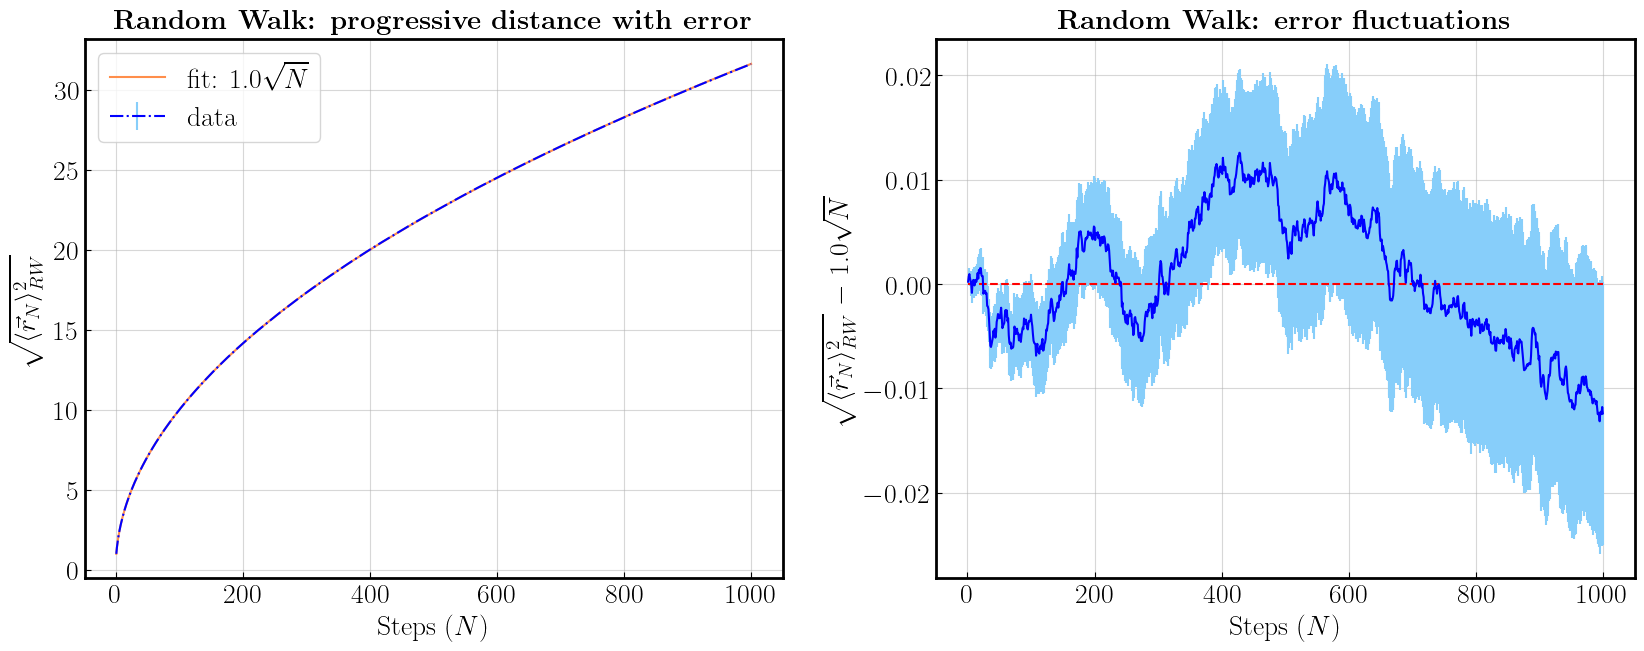

In [11]:
fig2, axs = plt.subplots(1, 2, figsize=(20, 7), gridspec_kw={'wspace': 0.22})

# plot 1
axs[0].errorbar(ddist[:,0], ddist[:,1], yerr=ddist[:,2], color='blue', linestyle='-.', ecolor='lightskyblue', label='data')
popt, pcov = curve_fit(fit_sqrt, ddist[:,0], ddist[:,1])
dist_fit = fit_sqrt(ddist[:,0], *popt)
axs[0].plot(ddist[:,0], dist_fit, color='#FF8E4B', label='fit: ' + str(np.round(popt[0], 3)) + '$\sqrt{N}$')

axs[0].set_title(r'\textbf{Random Walk: progressive distance with error}', pad=8)
axs[0].set_xlabel('Steps $(N)$')
axs[0].set_ylabel(r'$ \sqrt{\langle \vec{r}_N \rangle^2_{RW}} $', labelpad=8)
axs[0].legend()

# plot 2
axs[1].errorbar(ddist[:,0], ddist[:,1]-dist_fit, yerr=ddist[:,2], color='blue', ecolor='lightskyblue',)
zero = np.zeros(ddist.shape[0])
axs[1].plot(ddist[:,0], zero, c='red', ls='--')

axs[1].set_title(r'\textbf{Random Walk: error fluctuations}', pad=8)
axs[1].set_xlabel('Steps $(N)$')
axs[1].set_ylabel(r'$ \sqrt{\langle \vec{r}_N \rangle^2_{RW}} \ - \ $' + str(np.round(popt[0], 3)) + '$\sqrt{N}$', labelpad=6)

plt.show(fig2)
plt.close(fig2)

In [12]:
dex1 = np.loadtxt('02.2/discrete_example.csv', delimiter=',', skiprows=1)
dex = dex1[:1000,:]

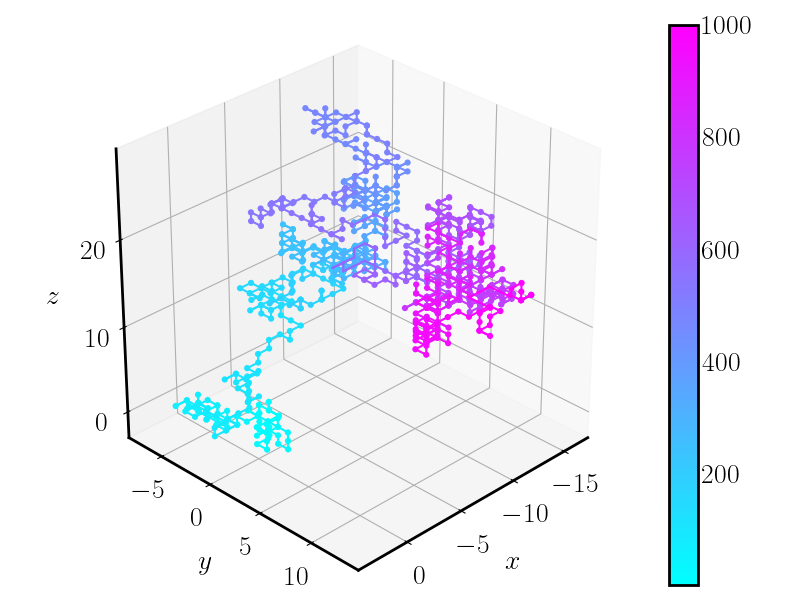

In [13]:
%matplotlib widget
#%matplotlib inline

fig3 = plt.figure()
ax = fig3.add_subplot(projection='3d')
cmap = plt.get_cmap('cool')
colors = cmap(dex[:,0] / dex[:,0].max())
scatter = ax.scatter(dex[:,1], dex[:,2], dex[:,3], c=dex[:,0], cmap=cmap, marker='o', edgecolors='none', alpha=1)
for i in range(1, len(dex)):
    ax.plot(dex[i-1:i+1, 1], dex[i-1:i+1, 2], dex[i-1:i+1, 3], color=colors[i])

ax.view_init(elev=30, azim=45)
ax.set_xlabel('$x$', labelpad=10)
ax.set_ylabel('$y$', labelpad=10)
ax.set_zlabel('$z$', labelpad=10)

fig3.colorbar(scatter)

ax.set_box_aspect([1,1,1])
fig3.tight_layout()

plt.show(fig3)
#fig3

In [14]:
plt.close(fig3)
%matplotlib inline

### Continue random walk

In [15]:
cdist1 = np.loadtxt('02.2/continue_distance.csv', delimiter=',', skiprows=1)
cdist = cdist1[:1000,:]

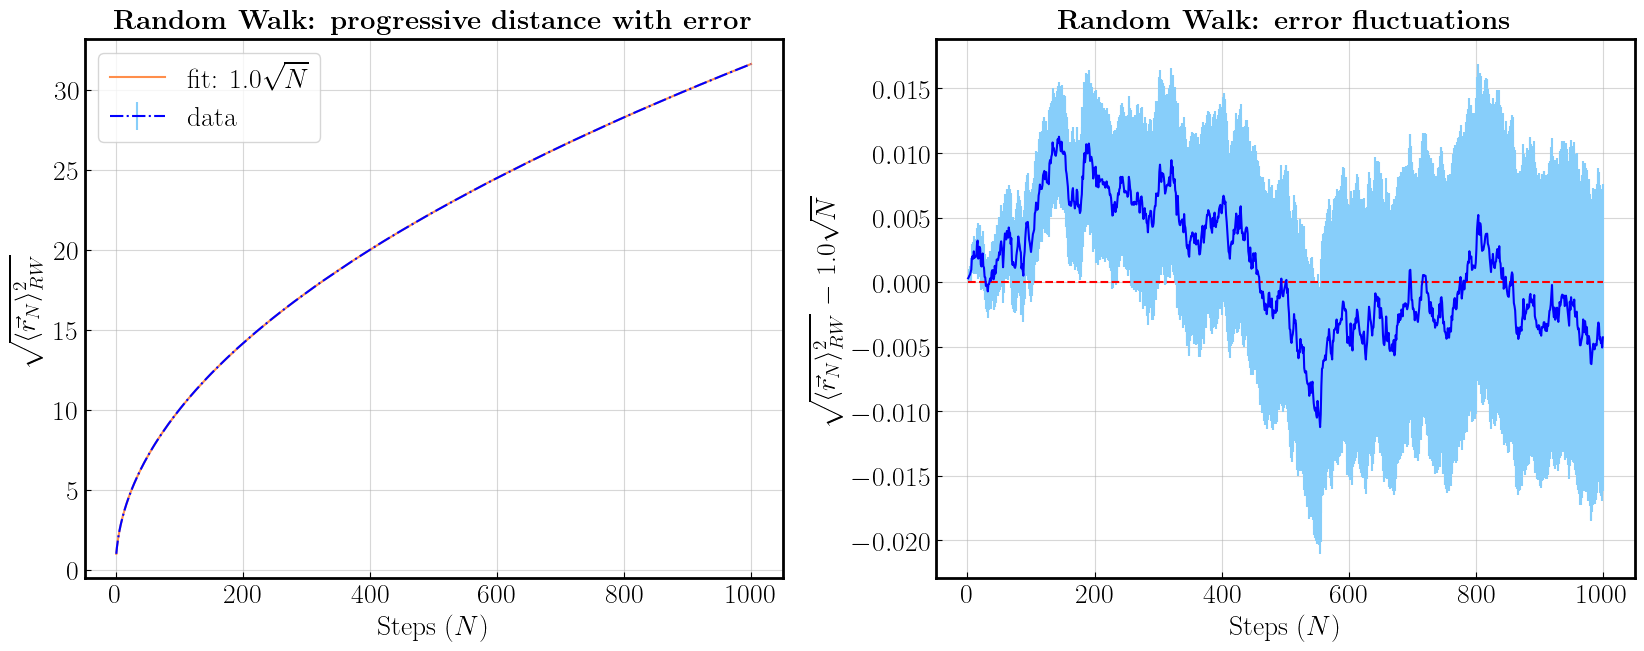

In [16]:
fig4, axs = plt.subplots(1, 2, figsize=(20, 7), gridspec_kw={'wspace': 0.22})

# plot 1
axs[0].errorbar(cdist[:,0], cdist[:,1], yerr=cdist[:,2], color='blue', linestyle='-.', ecolor='lightskyblue', label='data')
popt, pcov = curve_fit(fit_sqrt, cdist[:,0], cdist[:,1])
dist_fit = fit_sqrt(cdist[:,0], *popt)
axs[0].plot(cdist[:,0], dist_fit, color='#FF8E4B', label='fit: ' + str(np.round(popt[0], 3)) + '$\sqrt{N}$')

axs[0].set_title(r'\textbf{Random Walk: progressive distance with error}', pad=8)
axs[0].set_xlabel('Steps $(N)$')
axs[0].set_ylabel(r'$ \sqrt{\langle \vec{r}_N \rangle^2_{RW}} $', labelpad=8)
axs[0].legend()

# plot 2
axs[1].errorbar(cdist[:,0], cdist[:,1]-dist_fit, yerr=cdist[:,2], color='blue', ecolor='lightskyblue',)
zero = np.zeros(cdist.shape[0])
axs[1].plot(cdist[:,0], zero, c='red', ls='--')

axs[1].set_title(r'\textbf{Random Walk: error fluctuations}', pad=8)
axs[1].set_xlabel('Steps $(N)$')
axs[1].set_ylabel(r'$ \sqrt{\langle \vec{r}_N \rangle^2_{RW}} \ - \ $' + str(np.round(popt[0], 3)) + '$\sqrt{N}$', labelpad=6)

plt.show(fig4)
plt.close(fig4)


In [17]:
cex1 = np.loadtxt('02.2/continue_example.csv', delimiter=',', skiprows=1)
cex = cex1[:1000,:]

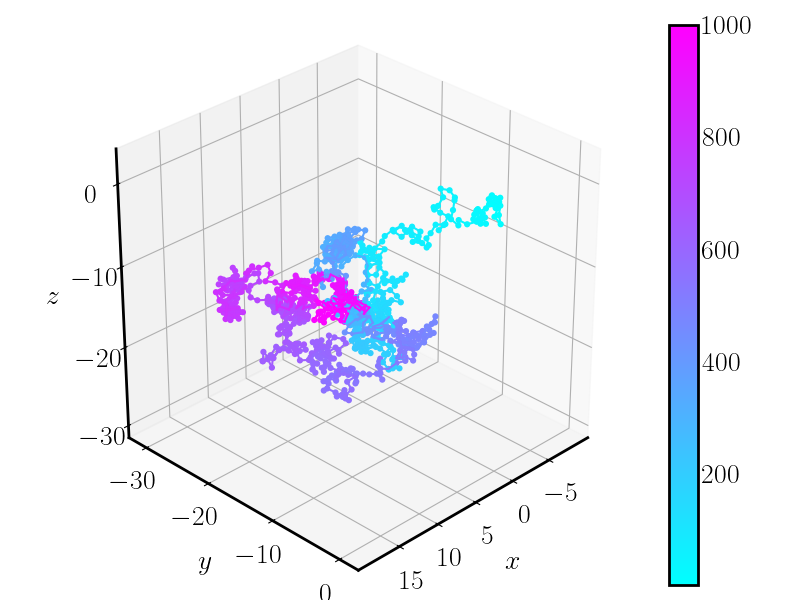

In [18]:
%matplotlib widget

fig5 = plt.figure()
ax = fig5.add_subplot(projection='3d')
cmap = plt.get_cmap('cool')
colors = cmap(cex[:,0] / cex[:,0].max())
scatter = ax.scatter(cex[:,1], cex[:,2], cex[:,3], c=cex[:,0], cmap=cmap, marker='o', edgecolors='none', alpha=1)
for i in range(1, len(cex)):
    ax.plot(cex[i-1:i+1, 1], cex[i-1:i+1, 2], cex[i-1:i+1, 3], color=colors[i])

ax.view_init(elev=30, azim=45)
ax.set_xlabel('$x$', labelpad=10)
ax.set_ylabel('$y$', labelpad=10)
ax.set_zlabel('$z$', labelpad=10)

fig5.colorbar(scatter)

ax.set_box_aspect([1,1,1])
fig5.tight_layout()

plt.show(fig5)

In [ ]:
plt.close(fig5)
%matplotlib inline